<a href="https://colab.research.google.com/github/sowndsgood/LinearAlgebra/blob/main/EigenValuesVectors/EigenValuesVectors_Notebook6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:

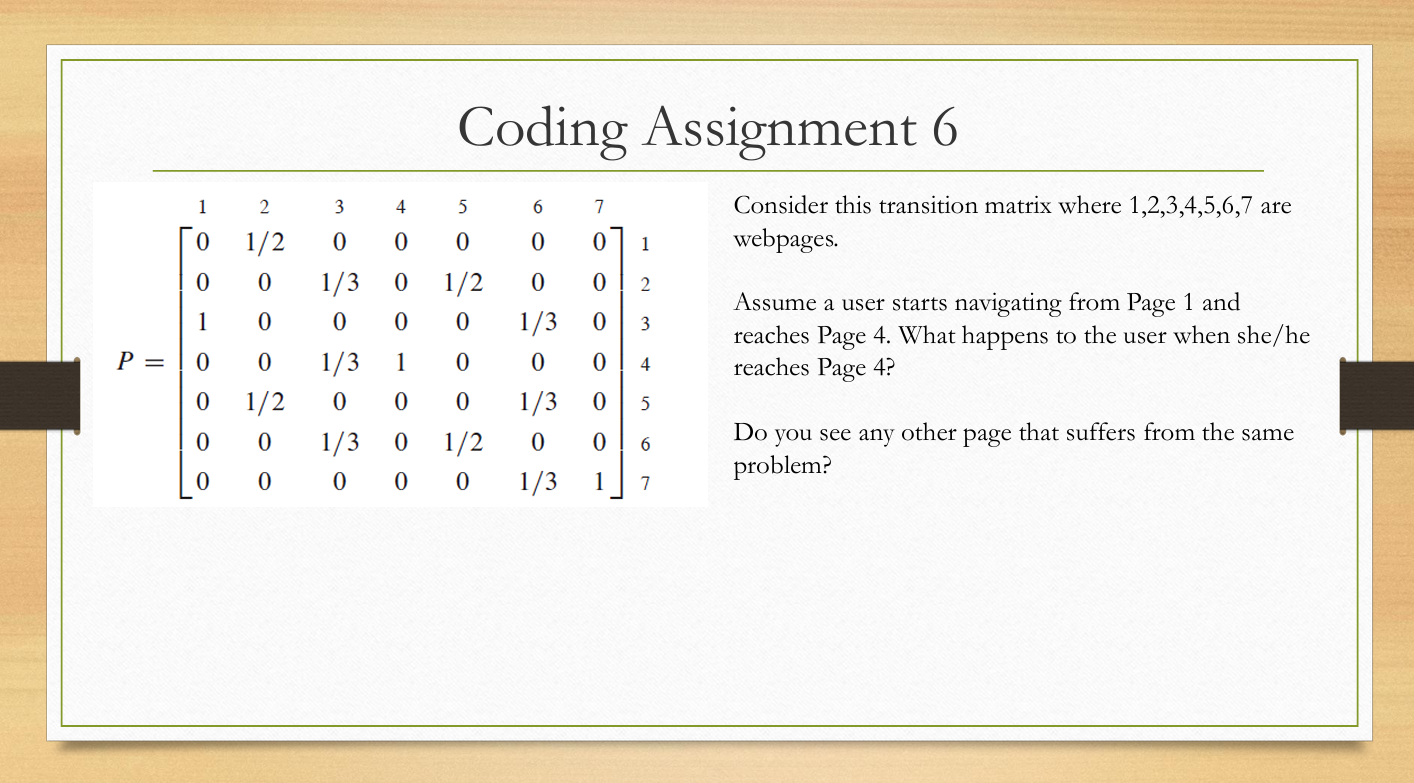

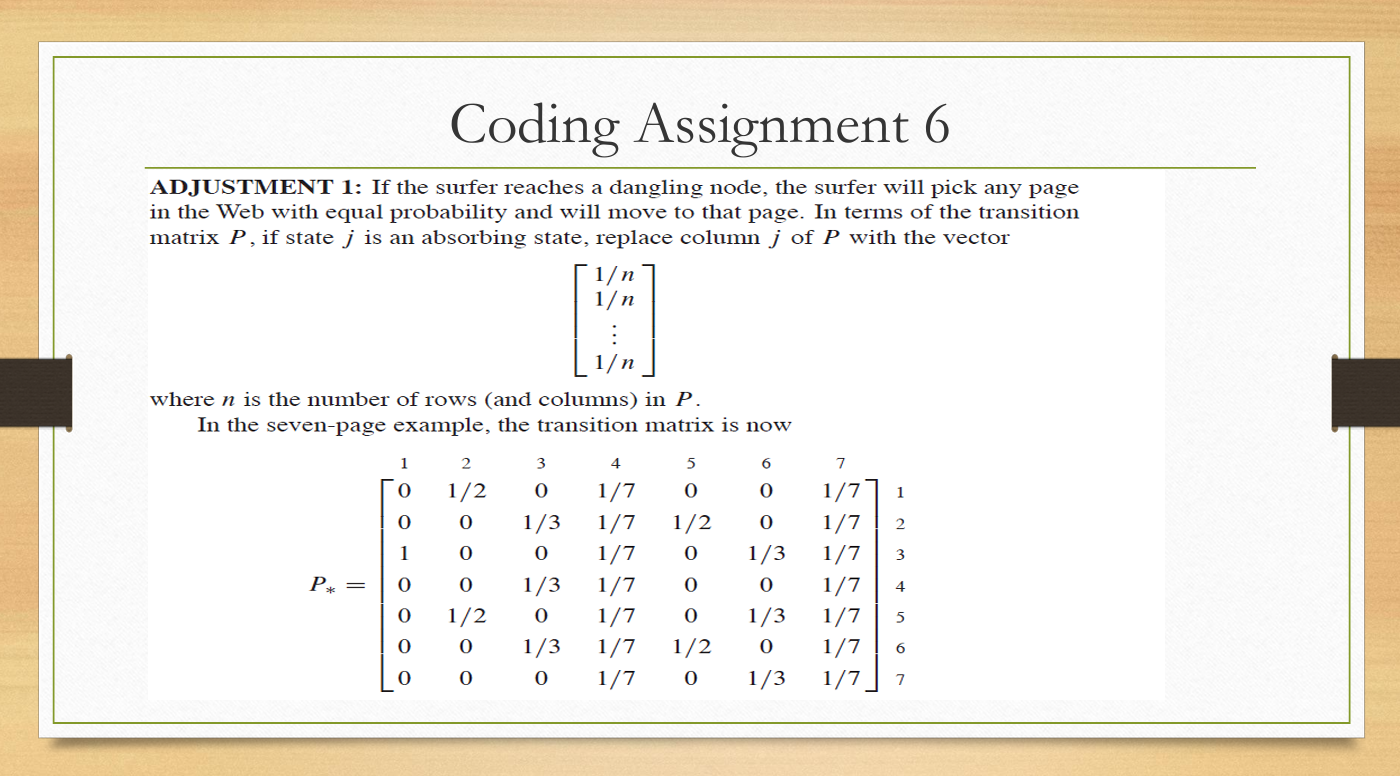

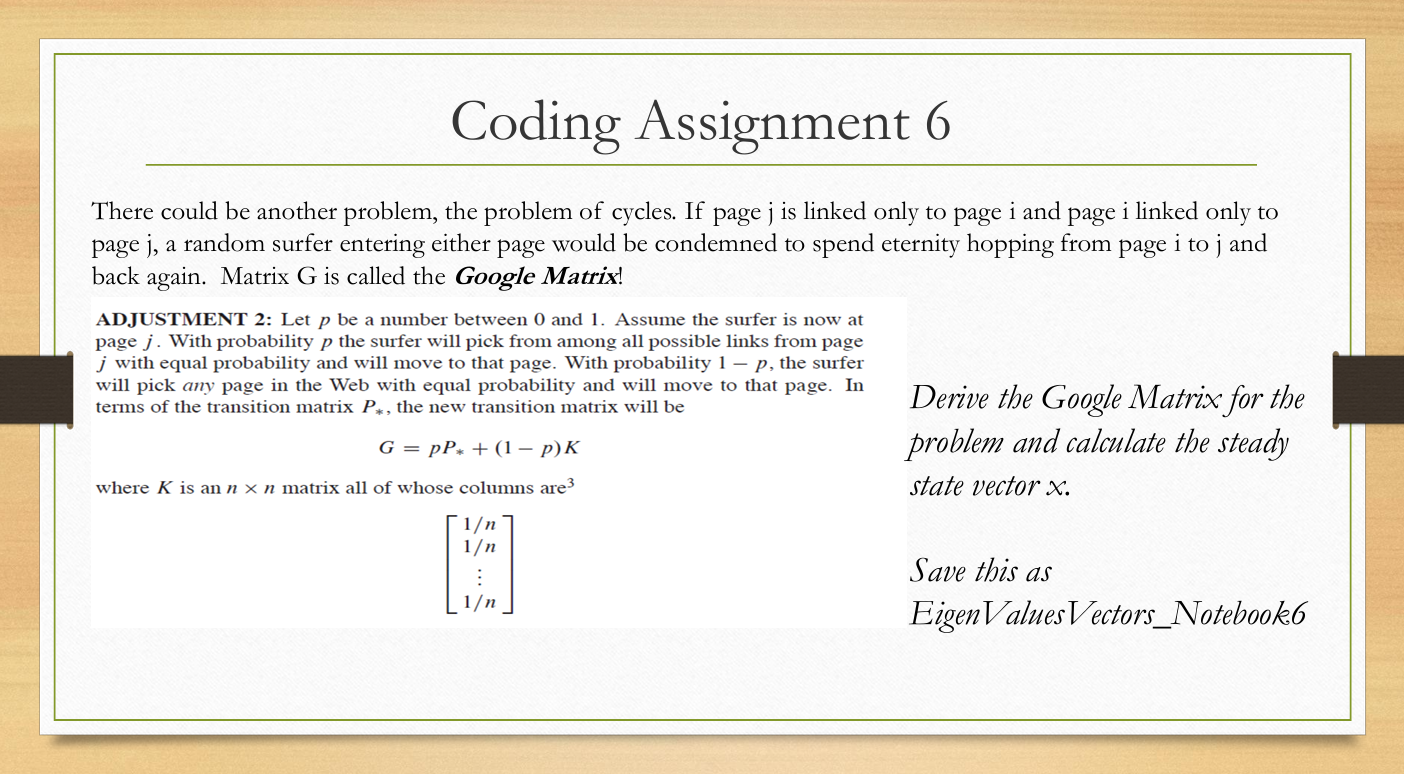

In [1]:
from IPython.display import Image, display

# List of image file names
image_files = ['EVV6(1).png', 'EVV6(2).png', 'EVV6(3).png']

# Display each image
for file in image_files:
    display(Image(file))

# Solution Summary:

1. **Transition Probability Matrix (P):**
   - The given transition probability matrix `P` represents the likelihood of transitioning from one page to another in a web network.
   - It describes the probability of moving from one page to another based on the links between pages.

2. **Handling Dangling Nodes:**
   - Dangling nodes are pages with no outgoing links, such as Page 4 and Page 7 in the provided matrix.
   - To handle dangling nodes, the code identifies the indices of dangling nodes and replaces the entire columns with equal probabilities, ensuring the random surfer can navigate from any dangling node with equal likelihood.

3. **Google Matrix (G):**
   - The Google Matrix `G` is constructed using the damping factor \( p \) and the adjusted transition probability matrix `P`.
   - The damping factor \( p \) represents the probability of the random surfer following a link versus teleporting to a random page.

4. **Steady-State Vector (x):**
   - The steady-state vector x represents the long-term probabilities of being on each page in the network.
   - It is computed by finding the eigenvector corresponding to the eigenvalue 1 of the Google Matrix `G`.
   - The resulting vector indicates the likelihood of the random surfer being on each page after navigating through the network indefinitely.

5. **Solution Presentation:**
   - The solution provides a clear summary of the transition probability matrix `P`, the Google Matrix `G`, and the steady-state vector x.
   - The steady-state vector is presented in a visually appealing format, displaying the probabilities associated with each page.

Overall, the solution addresses the problem of dangling nodes, constructs the Google Matrix with the damping factor, and computes the steady-state vector to analyze the long-term behavior of a random surfer in the web network.

## Problem:

When a user starts navigating from Page 1 and reaches Page 4 in the provided transition matrix:
1. The user cannot reach Page 4 from Page 1 as there is no direct link (transition probability is \(0\)).
2. Once the user reaches Page 4, there are no outgoing links (transition probabilities to other pages are all \(0\)).
3. Therefore, the user becomes stuck on Page 4 and cannot navigate further.

Similarly, Page 7 suffers from the same problem as Page 4, as there are no outgoing links from Page 7, meaning once the user reaches Page 7, they cannot navigate further.

In summary, when the user reaches **Page 4**, they get stuck on that page, and **Page 7** also poses the same problem.

### Importing Libraries

In [13]:
# Import NumPy library under the alias np
import numpy as np

### Step 1: Define the transition probability matrix P

In [14]:
# Define the transition probability matrix P
P = np.array([
    [0, 1/2, 0, 0, 0, 0, 0],
    [0, 0, 1/3, 0, 1/2, 0, 0],
    [1, 0, 0, 0, 0, 1/3, 0],
    [0, 0, 1/3, 1, 0, 0, 0],
    [0, 1/2, 0, 0, 0, 1/3, 0],
    [0, 0, 1/3, 0, 1/2, 0, 0],
    [0, 0, 0, 0, 0, 1/3, 1]
])

print("Transition Probability Matrix P:\n", P)

Transition Probability Matrix P:
 [[0.         0.5        0.         0.         0.         0.
  0.        ]
 [0.         0.         0.33333333 0.         0.5        0.
  0.        ]
 [1.         0.         0.         0.         0.         0.33333333
  0.        ]
 [0.         0.         0.33333333 1.         0.         0.
  0.        ]
 [0.         0.5        0.         0.         0.         0.33333333
  0.        ]
 [0.         0.         0.33333333 0.         0.5        0.
  0.        ]
 [0.         0.         0.         0.         0.         0.33333333
  1.        ]]


### Step 2: Handling Dangling Nodes

In [16]:
# Get the number of rows
n = len(P)

# Find the indices of dangling nodes (where the diagonal element is 1)
dangling_indices = np.where(np.diag(P) == 1)[0]

# Replace the entire columns of dangling nodes with 1/n
P[:, dangling_indices] = 1/n

print("Transition Probability Matrix P:\n", P)

Transition Probability Matrix P:
 [[0.         0.5        0.         0.14285714 0.         0.
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.5        0.
  0.14285714]
 [1.         0.         0.         0.14285714 0.         0.33333333
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.         0.
  0.14285714]
 [0.         0.5        0.         0.14285714 0.         0.33333333
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.5        0.
  0.14285714]
 [0.         0.         0.         0.14285714 0.         0.33333333
  0.14285714]]


### Step 3: Construct the Google Matrix G

In [17]:
# Probability damping factor
p = 0.9

# Get the number of rows
n = len(P)

# Construct the Google Matrix G
K = (1/n) * np.ones((n, n))
G = p * P  + (1 - p) * K

print("Google Matrix:\n", G)

Google Matrix:
 [[0.01428571 0.46428571 0.01428571 0.14285714 0.01428571 0.01428571
  0.14285714]
 [0.01428571 0.01428571 0.31428571 0.14285714 0.46428571 0.01428571
  0.14285714]
 [0.91428571 0.01428571 0.01428571 0.14285714 0.01428571 0.31428571
  0.14285714]
 [0.01428571 0.01428571 0.31428571 0.14285714 0.01428571 0.01428571
  0.14285714]
 [0.01428571 0.46428571 0.01428571 0.14285714 0.01428571 0.31428571
  0.14285714]
 [0.01428571 0.01428571 0.31428571 0.14285714 0.46428571 0.01428571
  0.14285714]
 [0.01428571 0.01428571 0.01428571 0.14285714 0.01428571 0.31428571
  0.14285714]]


### Step 4: Calculate the steady-state vector x

In [18]:
# Calculate the eigenvalues and eigenvectors of G
eigenvalues, eigenvectors = np.linalg.eig(G)

# Find the index of the eigenvalue closest to 1
index = np.argmin(np.abs(eigenvalues - 1))

# Extract the corresponding eigenvector
x = np.real(eigenvectors[:, index])

# Normalize the eigenvector to sum to 1
x = x / np.sum(x)

print("Steady-state vector x:\n", x)


Steady-state vector x:
 [0.11487166 0.1706182  0.19266342 0.09589249 0.16605711 0.1706182
 0.08927893]


### Step 5: Presenting the Solution

In [19]:
# Display the steady-state vector x with better presentation
print("Steady-state vector x:")
for i, prob in enumerate(x, start=1):
    print(f"Page {i}: {prob:.4f}")

Steady-state vector x:
Page 1: 0.1149
Page 2: 0.1706
Page 3: 0.1927
Page 4: 0.0959
Page 5: 0.1661
Page 6: 0.1706
Page 7: 0.0893
